# Import Data

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import expon, kstest, zscore

diceDf = pd.read_csv("DiceData.csv")
activityDf = pd.read_csv("ActivityData.csv")
sleepHealthDf = pd.read_csv("SleepHealthData.csv")

# Bagian 1

probabilitas empiris angka genap dan angka lebih besar dari 4

In [190]:
probabilityGenap = diceDf['Dice-0'].isin([2, 4, 6]).sum() / len(diceDf)
probabilityFour = (diceDf['Dice-0'] > 4).sum() / len(diceDf)

print(f"Probabilitas empiris genap : {probabilityGenap:.2f}\nProbabilitas empiris > 4 : {probabilityFour:.2f}")

Probabilitas empiris genap : 0.57
Probabilitas empiris > 4 : 0.40


# Bagian 2 & 3

In [191]:
activityInterarrival = activityDf['Timestamp'].diff().dropna().reset_index(drop=True)
interarrivalDf = pd.DataFrame({
    'Interarrival Time': activityInterarrival
})

interarrivalDf['Z-Score'] = zscore(interarrivalDf['Interarrival Time'])

meanActivityInterarrival = interarrivalDf['Interarrival Time'].mean()
print(f"\navg time krjadian: {meanActivityInterarrival:.2f}s")

interarrivalDf


avg time krjadian: 2.95s


,Interarrival Time,Z-Score
0,0.668232,-0.722132
1,2.880905,-0.020523
2,2.930678,-0.004740
3,0.321990,-0.831920
4,6.872717,1.245227
5,0.618924,-0.737767
6,0.531794,-0.765395
7,6.268184,1.053538
8,0.546060,-0.760871
9,1.144999,-0.570955


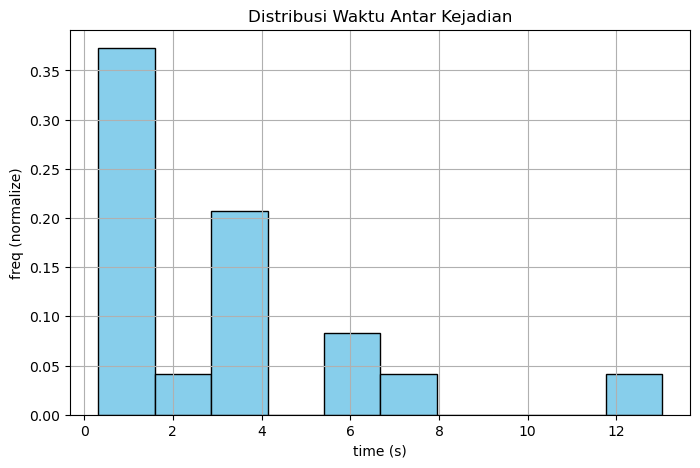

In [192]:
plt.figure(figsize=(8, 5))
plt.hist(activityInterarrival, bins=10, color='skyblue', edgecolor='black', density=True)
plt.title("Distribusi Waktu Antar Kejadian")
plt.xlabel("time (s)")
plt.ylabel("freq (normalize)")
plt.grid(True)
plt.show()

In [193]:
ks_statistic, ks_p_value = kstest(interarrivalDf['Interarrival Time'].dropna(), 'expon', args=(0, 5))
print(f"K-S Statistic: {ks_statistic}")
print(f"P-Value: {ks_p_value}")

if ks_p_value > 0.05:
    print("acc")
else:
    print("reject")

K-S Statistic: 0.2959519751960974
P-Value: 0.057048152288282084
acc


# Bagian 4

In [194]:

z = 1.96
n = len(interarrivalDf['Interarrival Time'])
meanCol = interarrivalDf['Interarrival Time'].mean()
stdevCol = interarrivalDf['Interarrival Time'].std(ddof=1)
marginErrCol = z * (stdevCol / np.sqrt(n))

CIDf = pd.DataFrame({
    'Interarrival Time': interarrivalDf['Interarrival Time'],
    'Stdev': [stdevCol] * n,
    'Margin of Error': [marginErrCol] * n,
    'CI Lower (95%)': [meanCol - marginErrCol] * n,
    'CI Upper (95%)': [meanCol + marginErrCol] * n
})
CIDf

,Interarrival Time,Stdev,Margin of Error,CI Lower (95%),CI Upper (95%)
0,0.668232,3.240132,1.456941,1.488687,4.402569
1,2.880905,3.240132,1.456941,1.488687,4.402569
2,2.930678,3.240132,1.456941,1.488687,4.402569
3,0.321990,3.240132,1.456941,1.488687,4.402569
4,6.872717,3.240132,1.456941,1.488687,4.402569
5,0.618924,3.240132,1.456941,1.488687,4.402569
6,0.531794,3.240132,1.456941,1.488687,4.402569
7,6.268184,3.240132,1.456941,1.488687,4.402569
8,0.546060,3.240132,1.456941,1.488687,4.402569
9,1.144999,3.240132,1.456941,1.488687,4.402569


# Bagian 5

In [195]:
sleepHealthDf.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [196]:
sleepHealthDf[['Sleep Duration', 'Heart Rate']].corr().loc['Sleep Duration', 'Heart Rate']
corrSleepHR = sleepHealthDf[['Sleep Duration', 'Heart Rate']].corr().loc['Sleep Duration', 'Heart Rate']
print(f"Correlation : {corrSleepHR}")


Correlation : -0.516454888517144


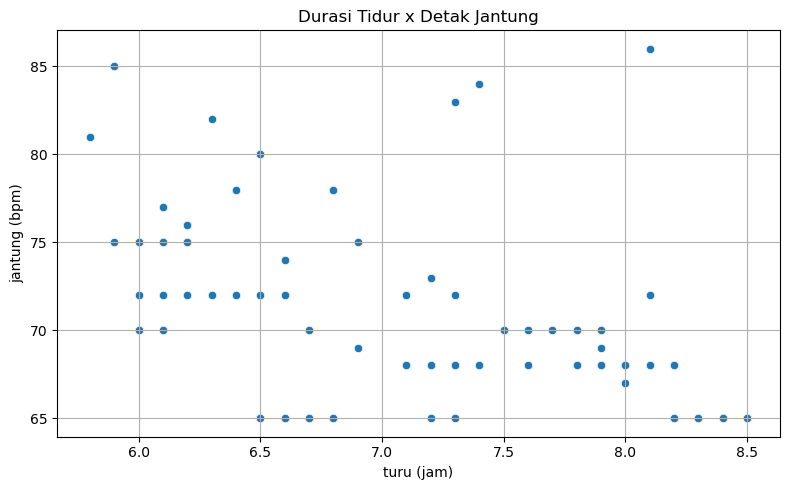

In [198]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sleepHealthDf, x='Sleep Duration', y='Heart Rate')
plt.title('Durasi Tidur x Detak Jantung')
plt.xlabel('turu (jam)')
plt.ylabel('jantung (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()